In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.RGBANet()

CNN configuration: 
    Our CNN with image, prob, merged_array, border_overlap as RGBA.
    


In [3]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder_small1_rgba')

Loaded /home/d/patches//cylinder_small1_rgba/ in 0.144218921661 seconds.


In [4]:
cnn = cnn.fit(X_train['rgba'], y_train)

# Neural Network with 1558642 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     4x75x75
  1  conv1     64x63x63
  2  pool1     64x31x31
  3  conv2     48x19x19
  4  pool2     48x9x9
  5  hidden3   256
  6  dropout3  256
  7  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.70505       0.67564      1.04353      0.68583  8.04s
      2       0.79774       0.68894      1.15792      0.49935  8.00s
      3       0.61422       0.61823      0.99352      0.71225  7.97s
      4       0.55081       0.51828      1.06277      0.77054  7.97s
      5       0.46730       0.43158      1.08277      0.80996  7.99s
      6       0.42587       0.37492      1.13590      0.84105  8.01s
      7       0.35317       0.30767      1.14789      0.87543  7.97s
      8       0.28840       0.26615      1.08361      0.89087  7.98s
      9       0.24999

In [5]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score(X_test['rgba'], y_test)

0.8017638036809815

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

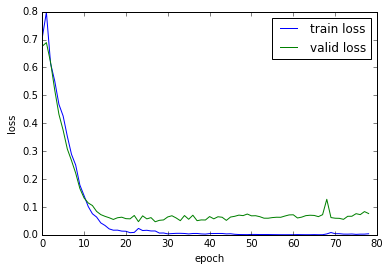

In [6]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)